# PERCEPTRON
Our model describe a linear classifier that divides the coordinate plane into two halves,
the line in the example is y=x.
We want to learn a parameter vector such that our model make the right prediction.
This model is called a linear perceptron.
The cost function minimize the distance in the two norm.

In [162]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot

In [163]:
def activation(t): return (1-np.exp(-t))/(1+np.exp(-t))
def neuron(w,b,x):return activation(np.inner(w,x)+b)

In [164]:
#Train the neuron with some good data
data = np.array([[[1,1.5],+1],
       [[3,4],+1],
       [[4,3],-1],
       [[1.5,1],-1]],dtype=object)
print('first data',data[0,0], 'Label',data[0,1])
print('second data',data[2,0], 'Label',data[2,1])
dataset = np.random.randn(100,2) #random distribution of normal distributed points

first data [1, 1.5] Label 1
second data [4, 3] Label -1


In [55]:
def cost(teta):
    w=teta[0:2]
    b=teta[2]
    c=0
    for k in range(len(data)):
        c +=(neuron(w,b,data[k,0])-data[k,1])**2#error between the computed output and the real output
    return c/2

In [165]:
x0 = np.array([1.,1.,1.]);
opt = scipy.optimize.minimize(cost,x0);
print(opt.x)
print(opt.message)

[-14.43839062  14.66289908  -0.07286616]
Optimization terminated successfully.


In [166]:
def neuronopt(x): return neuron(opt.x[0:2],opt.x[2],x);
neuronopt([2,1])

-0.9999987515425057

In [58]:
datatest1 = np.array([p for p in dataset if neuronopt(p)>0])
datatest2 = np.array([p for p in dataset if neuronopt(p)<=0])


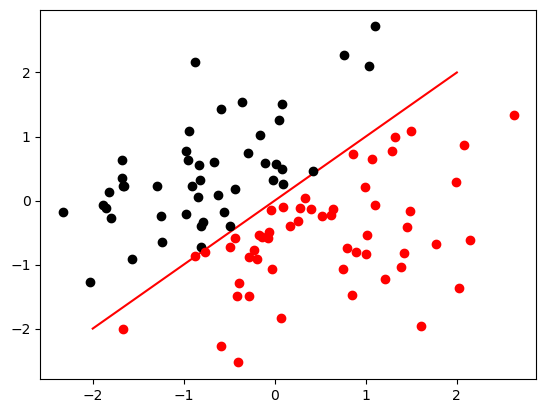

In [167]:
matplotlib.pyplot.plot([-2,2],[-2,2],'r', datatest1[::,0], datatest1[::,1],'ko',  datatest2[::,0], datatest2[::,1],'ro');

In [168]:
def grad_cost(teta):
    w=teta[0:2]
    b=teta[2]
    gr=np.zeros((1,2))
    b = 0;
    (n,m)=data.shape
    
    for k in range(n):
        yk = neuron(w,b,data[k,0]) 
        gr += (yk-data[k,1])*np.asarray(data[k,0])*(1-yk**2)/2.0
        b += (yk-data[k,1])*(1-yk**2)/2.0
    grt = np.array( [gr[0,0],gr[0,1],b])
   
    return grt

In [169]:
import numpy as np
def steep_desc(teta,alpha,tol,data):
   
    w31 = np.copy(teta)
   
    nitmax = 60000
    err=1
    nit=0
    while err > tol and nit < nitmax:
        nit=nit+1
        grad = grad_cost(w31)
        w31 = w31 - alpha*grad
        err =  np.linalg.norm(np.abs(grad))
    print('nit',nit,err,w31)
    return w31  

In [172]:
x0 = np.array([1.,1.,1]);
opt = scipy.optimize.minimize(cost,x0);
print(opt.x, cost(opt.x))
print(opt.message)
print(opt.nit,opt.fun)
optw = steep_desc(x0,0.1, 1e-3,data)
print(optw,cost(optw))

[-14.43839062  14.66289908  -0.07286616] 4.165100553450408e-06
Optimization terminated successfully.
22 4.165100553450408e-06
nit 14928 0.0009999368640860762 [-7.88922196  7.88980998  0.47597466]
[-7.88922196  7.88980998  0.47597466] 0.004222290806112589


In [173]:
def neuronoptw(x): return neuron(optw[0:2],optw[2],x);

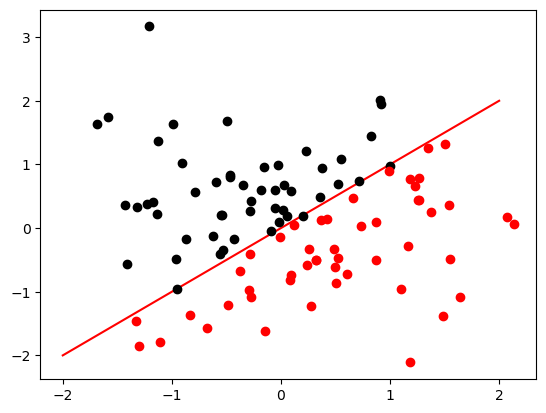

In [174]:
datatest1w = np.array([p for p in dataset if neuronoptw(p)>0])
datatest2w = np.array([p for p in dataset if neuronoptw(p)<0])
matplotlib.pyplot.plot([-2,2],[-2,2],'r', datatest1w[::,0], datatest1w[::,1],'ko',  datatest2w[::,0], datatest2w[::,1],'ro');

Exercise: Implement the backtraking approach for the comoputation of the step-length at each iteration of the line search method that uses the steepest direction. Compare the results with the method that uses a constant value of the step-length.